# Analisi SQUAT
> Decision TreeClassifier

> Logistic Regression 

> Regressione lineare multivariata

In [66]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns

In [67]:
max_lunghezza_albero = 100
potatura = 0.001

random_state = None 
shift = 8

## Import dati

In [68]:
df = pd.read_csv('/Users/paoloartasensi/Python_Scripts/artabax/SquatMixWatch.csv' , sep=';' , decimal='.')
df.set_index('Time', inplace=True)
df

,Ax,Ay,Az,Gx,Gy,Gz,BAR,P,R,Mag,UP,DOWN
Time,,,,,,,,,,,,
0,9.51781,3.37219,1.75315,3.01000,-0.56000,-1.33000,994.56250,0,0,0,0,0
1,9.42919,3.47517,1.64538,-2.24000,-2.80000,1.89000,994.59790,0,0,0,0,0
2,9.42201,3.36740,1.54239,2.03000,-1.61000,0.35000,994.59814,0,0,0,0,0
3,9.52739,3.38177,1.55916,0.14000,1.05000,0.91000,994.57397,0,0,0,0,0
4,9.43638,3.32189,1.55197,1.26000,1.54000,1.12000,994.57324,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
576,3.58534,3.98292,8.62447,-15.74999,3.78000,-9.73000,994.60645,0,0,0,0,0
577,3.60211,2.92671,7.85327,-38.70998,15.81999,-25.05999,994.60376,0,0,0,0,0
578,2.62973,2.71116,7.94907,-8.33000,43.74998,-56.83998,994.58154,0,0,0,0,0


In [69]:
df_temp = df.loc[df['DOWN'] ==1]
np.array(df_temp.index)

array([ 39,  72, 104, 237, 282, 332])

In [70]:
# applico uno shift per ogni posizione i con ['DOWN']==1, 
# assegno alle righe prima e dopo ['DOWN']=1
# numero di righe determinato da [shift]

df_temp = df.loc[df['DOWN'] ==1]
pos = np.array(df_temp.index)

for i in pos:
    for k in range(-shift+1, shift, 1):
        df.at[i+k, 'DOWN'] =1


df.dropna(inplace=True)
df_temp = df.loc[df['DOWN'] ==1]
np.array(df_temp.index)

array([ 32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 230, 231, 232, 233, 234, 235, 236,
       237, 238, 239, 240, 241, 242, 243, 244, 275, 276, 277, 278, 279,
       280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 325, 326, 327,
       328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339])

## Preparazione datasets

In [71]:
## Y è l'output che utilizziamo come training
## X sono le feautures, BISOGNA togliere la Y dalle colonne feautures 
y = df['DOWN']
X = df.copy()
X.drop(columns=['DOWN','Mag','UP'], axis=1, inplace=True)

##Divido il campione in Train e Test
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

# Modelli

## DecisionTree Classifier

In [86]:
potatura = 0.005

Accuracy:   0.985
Precision:  0.741
Recall:     0.833


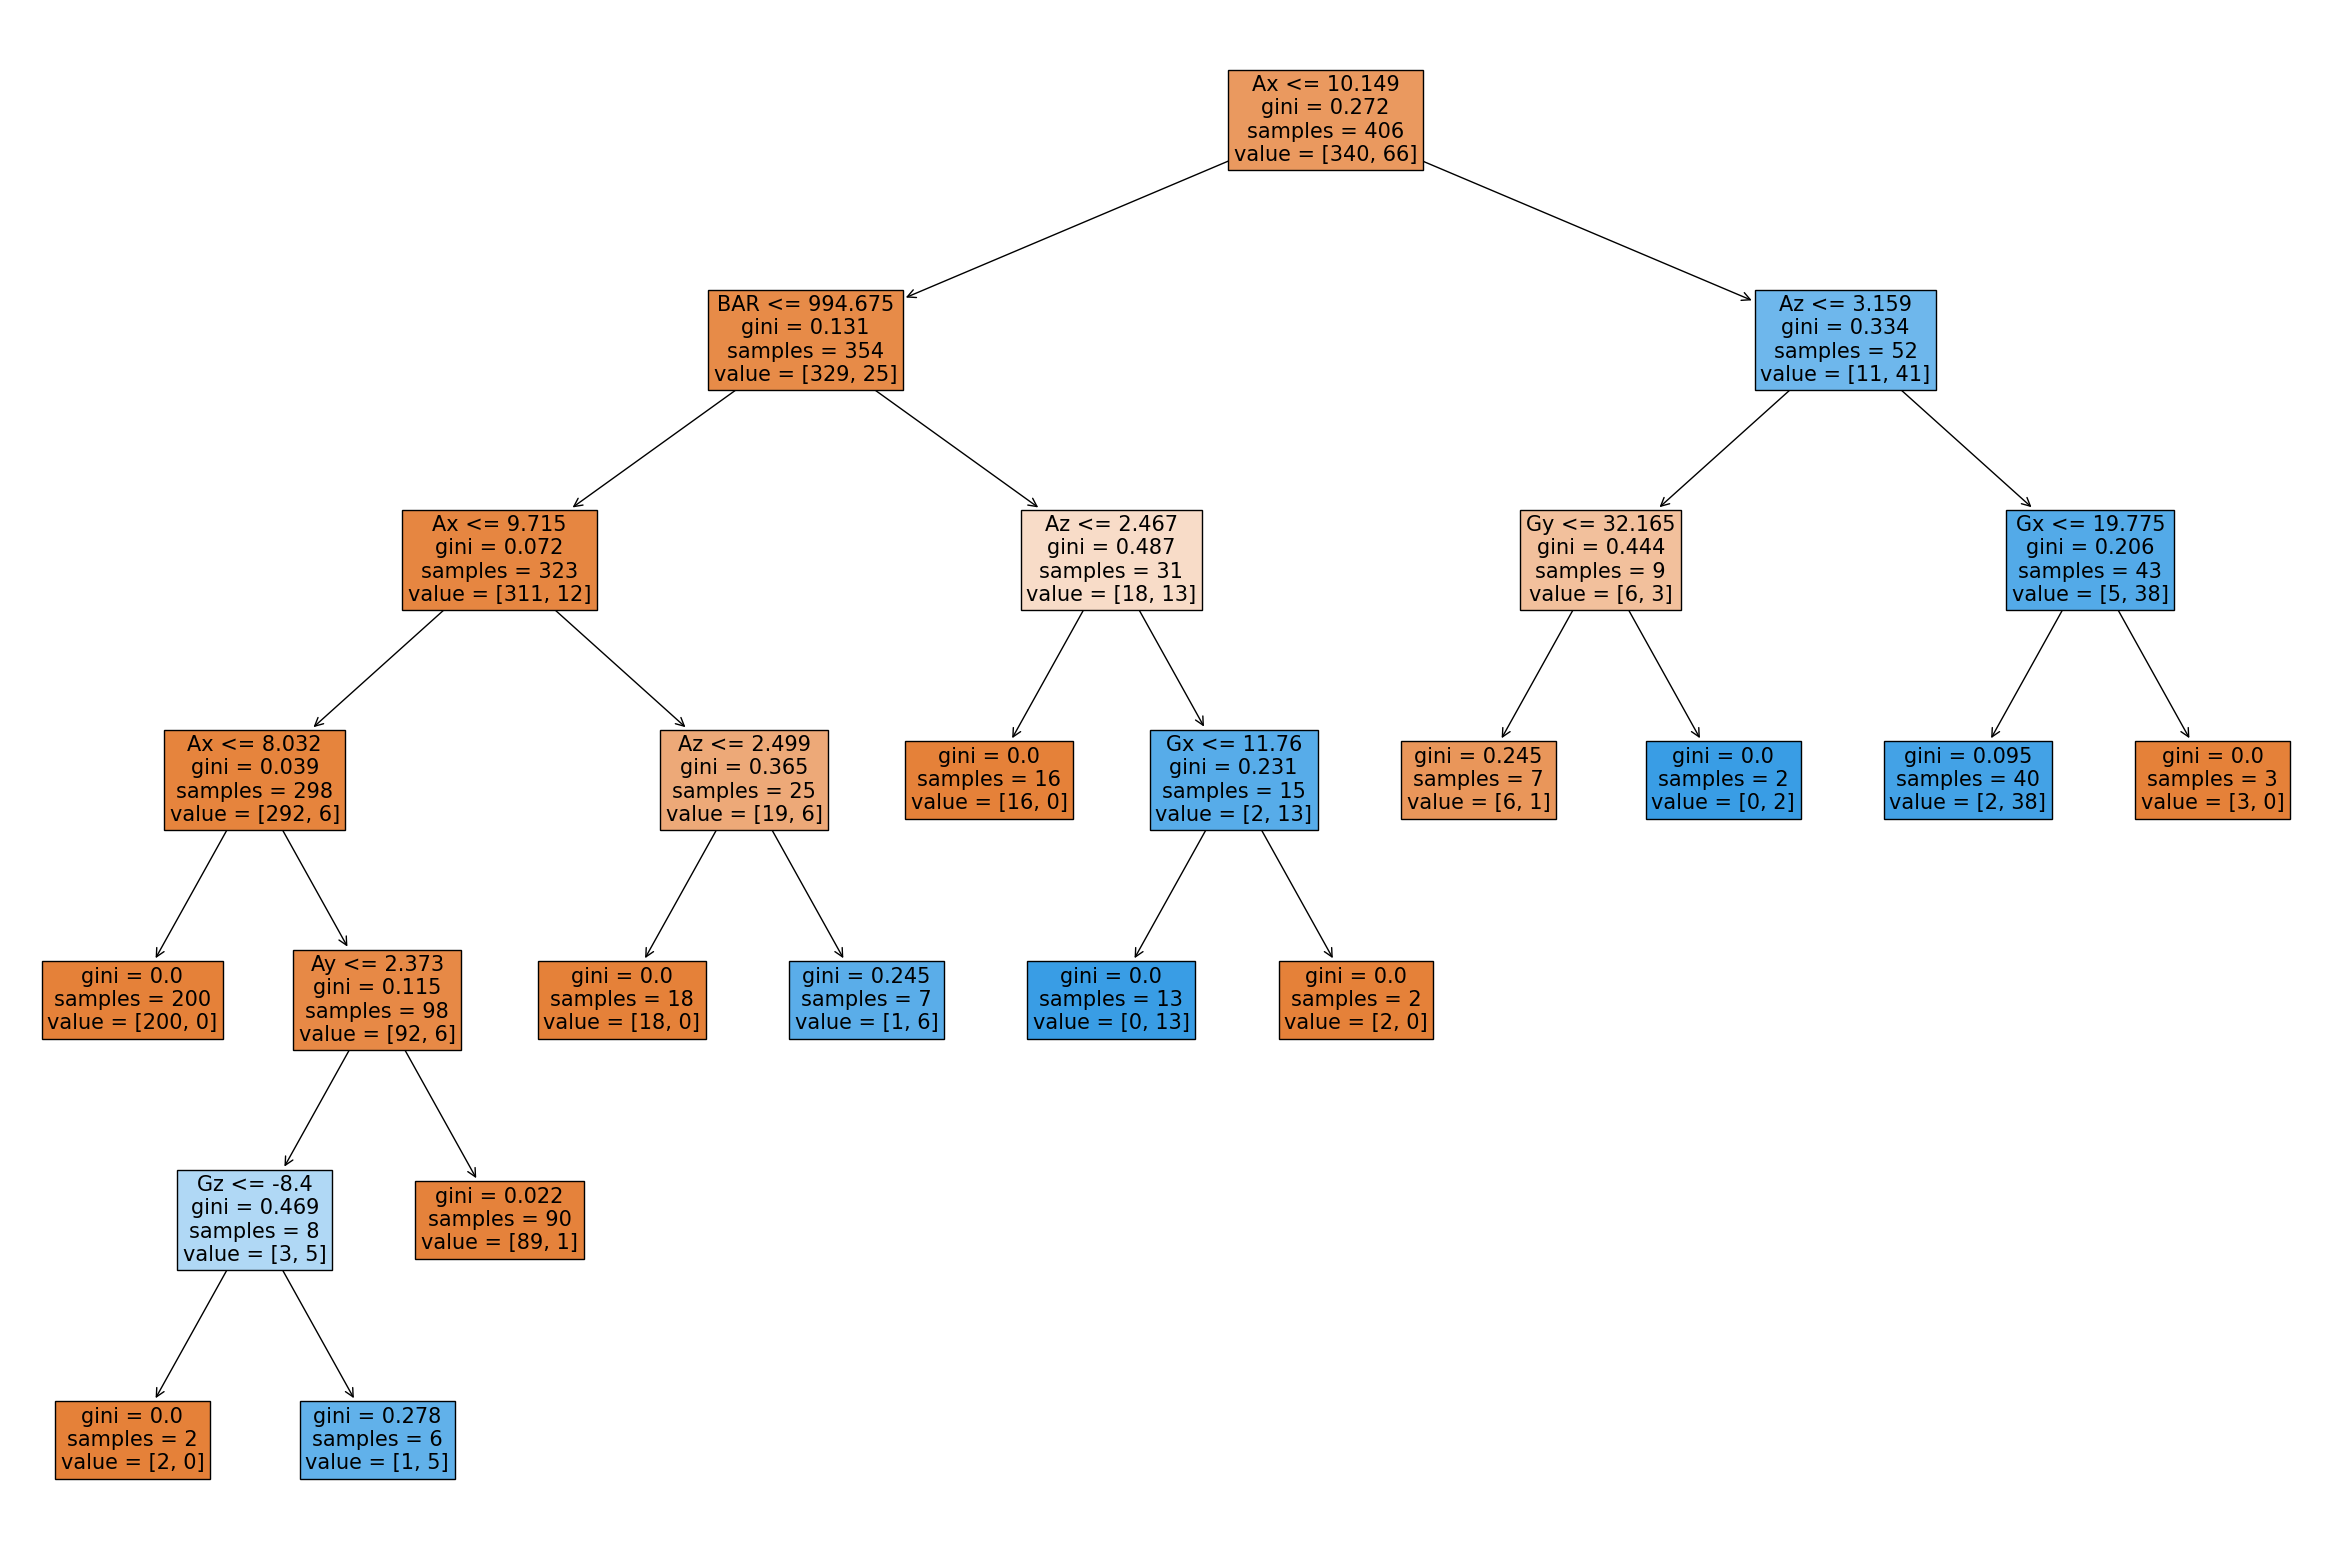

In [87]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=max_lunghezza_albero , ccp_alpha=potatura)
clf = clf.fit(X_train, y_train)
param = clf.get_params()
predictions = clf.predict(X_test)
accuracy = clf.score(X_train, y_train)
precision = precision_score(y_true= y_test, y_pred=predictions)
recall = recall_score(y_true= y_test, y_pred=predictions)

print('Accuracy:  ', round(accuracy,3))
print('Precision: ', round(precision,3))
print('Recall:    ', round(recall,3))

from sklearn import tree
feature_names = X.columns
fig = plt.figure(figsize=(30,20))
_= tree.plot_tree(clf, 
        feature_names=feature_names, 
        filled=True, fontsize=15)


In [74]:
##importanza features
feature_names = X.columns
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(0, ascending=False)

print(feature_importance.head(10))
important_features = list(feature_importance[feature_importance[0]>0].index)
# feature_importance.head(10).plot(kind='bar')

            0
Ax   0.480740
Az   0.231841
Gx   0.092437
BAR  0.074757
Ay   0.055661
Gy   0.049486
Gz   0.015077
P    0.000000
R    0.000000


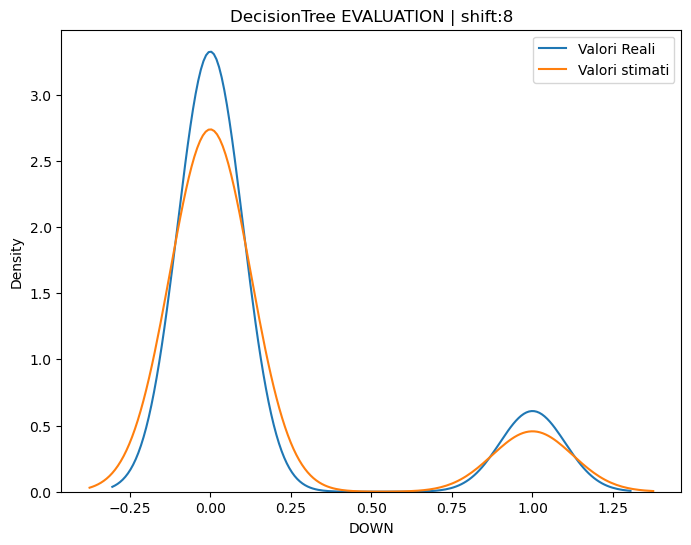

In [75]:
plt.figure(figsize=(8, 6))
plt.title('DecisionTree EVALUATION' +' | shift:'+str(shift))
sns.kdeplot(data=df, x='DOWN' , label='Valori Reali')
sns.kdeplot(predictions , label='Valori stimati')
plt.legend()
plt.show()

## Logistic Regression

In [76]:
log_reg = LogisticRegression(random_state=random_state, solver = 'lbfgs', max_iter=10000)
log_reg.fit(X_train, y_train)

# predict - Predict class labels for samples in X
y_pred = log_reg.predict(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

lr = pd.DataFrame(data =[X_train.columns, np.array(log_reg.coef_[0]).tolist()]).T
lr.rename(columns={0:'Reg',1:'Logistic'}, inplace=True)
lr.set_index('Reg', inplace=True)
lr.sort_values(by='Logistic', key=abs, ascending=False , inplace=True)
print(lr)

     Logistic
Reg          
Ax   1.209138
Az   0.531926
Ay  -0.139897
Gz   0.016281
BAR -0.013875
Gx   -0.01323
Gy   0.006295
P         0.0
R         0.0


In [77]:
'''Logistic Regression EVALUATION'''

# Accuracy on Train
print("LogReg Training Accuracy is: ", log_reg.score(X_train, y_train))
# Accuracy on Test
print("LogReg Testing Accuracy is: ", log_reg.score(X_test, y_test))
# Classification Report


LogReg Training Accuracy is:  0.9310344827586207
LogReg Testing Accuracy is:  0.9028571428571428


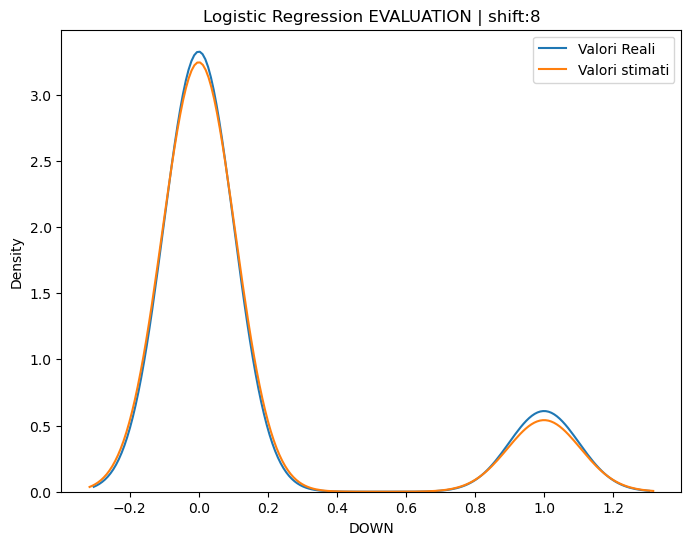

In [78]:
plt.figure(figsize=(8, 6))
plt.title('Logistic Regression EVALUATION' +' | shift:'+str(shift))
sns.kdeplot(data=df, x='DOWN' , label='Valori Reali')
sns.kdeplot(y_pred , label='Valori stimati')
plt.legend()
plt.show()

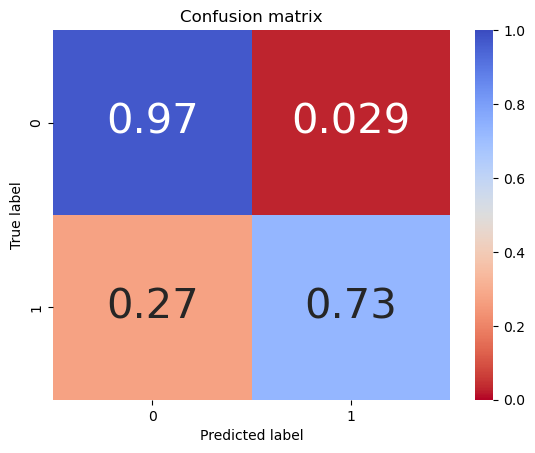

In [79]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="coolwarm_r", 
                    xticklabels=classes, 
                    yticklabels=classes, 
                    vmin=0., vmax=1., 
                    annot=True, annot_kws={'size':30}
                    )
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [80]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)

The True Positive Rate is: [0.97058824 0.72727273]
The Precision is: [0.94827586 0.82758621]
The False positive rate is: [0.27272727 0.02941176]
The False Negative Rate is:  [0.02941176 0.27272727]


## Regressione Lineare Multivariata

          RLM
Reg          
BAR  1.042532
Ax   0.035499
Az   0.028691
Ay    -0.0254
Gy   0.000631
Gz   0.000287
Gx  -0.000065
P         0.0
R         0.0
Termine noto: -1036.9699101299734
 
Precisione:  0.27529295805434106


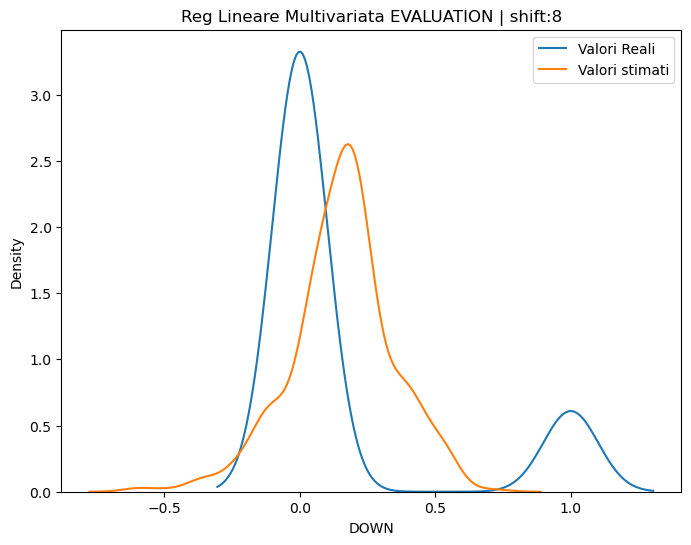

In [81]:
mlr = LinearRegression()
y = df['DOWN']
X = df.copy()
X.drop(columns=['DOWN','Mag','UP'], axis=1, inplace=True)

mlr.fit(X, y)
Y_hat = mlr.predict(X)
b0 = mlr.coef_
b1 = mlr.intercept_

reg = pd.DataFrame(data =[X.columns, b0]).T
reg.rename(columns={0:'Reg',1:'RLM'}, inplace=True)
reg.set_index('Reg', inplace=True)
reg.sort_values(by='RLM', key=abs, ascending=False , inplace=True)

print(reg)
print('Termine noto:',b1)
print(' ')
print('Precisione: ', mlr.score(X, y))

plt.figure(figsize=(8, 6))
plt.title('Reg Lineare Multivariata EVALUATION' +' | shift:'+str(shift))
sns.kdeplot(data=df, x='DOWN' , label='Valori Reali')
sns.kdeplot(Y_hat , label='Valori stimati')
plt.legend()
plt.show()
